<a href="https://colab.research.google.com/github/twisha-k/Python_notes/blob/main/126_coding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lesson 126: Naive Bayes Classifier - Understanding Bayes' Theorem

---

### Teacher-Student Activities

In the previous class, we implemented Naive Bayes Classifier using `sklearn` module of Python on UCI **Heart Disease dataset** and predicted the chances of a person getting heart disease.  

In today's class, we will understand the working of Naive Bayes Classifier with a relatively simple example and explore the underlying mathematics behind the Bayes' theorem.

Let us first recall the attributes or columns of the heart disease dataset and begin the class from **Activity 1: Understanding Joint and Conditional Probability**.


---

#### Problem Statement

The Heart Disease UCI dataset contains data collected on 14 different attributes by examining 303 patients. The dataset focuses only on differentiating patients having heart disease; labelled as value 1 and those not having heart disease; labelled as value 0. The 14 attributes (or columns) are as follows:

|Name|Description|
|-|-|
|age|age in years|
|sex|sex (1 = male; 0 = female)|
|cp|chest pain type <br> -- Value 1: typical angina <br> -- Value 2: atypical angina <br> -- Value 3: non-anginal pain <br> -- Value 4: asymptomatic |
|trestbps|resting blood pressure (in mm Hg on admission to the hospital) |
|chol|serum cholestoral in mg/dl|
|fbs| (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) |
|restecg| resting electrocardiographic results <br> -- Value 0: normal <br> -- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV) <br> -- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria |
|thalach|maximum heart rate achieved|
|exang|exercise induced angina (1 = yes; 0 = no) |
|oldpeak|ST depression induced by exercise relative to rest|
|slope|the slope of the peak exercise ST segment <br> -- Value 1: upsloping <br> -- Value 2: flat <br> -- Value 3: downsloping |
|ca|number of major vessels (0-3) colored by flourosopy |
|thal| 3 = normal; 6 = fixed defect; 7 = reversable defect|
|target|1 = presence of heart disease; 0 = absence of heart disease|

**Dataset Source:** https://archive.ics.uci.edu/ml/datasets/Heart+Disease

**Acknowledgements:**

Creators:

1. Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.
2. University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.
3. University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.
4. V.A. Medical Center, Long Beach and Cleveland Clinic Foundation: Robert Detrano, M.D., Ph.D.

Donor:
David W. Aha (aha '@' ics.uci.edu) (714) 856-8779

**Citations:** Dua, D., & Graff, C.. (2017). UCI Machine Learning Repository.


---

#### Recap
#### Importing Modules and Loading Data

Import the basic libraries and load the heart disease dataset.

**Dataset Link:** https://s3-student-datasets-bucket.whjr.online/whitehat-ds-datasets/uci-heart-disease/heart.csv


In [ ]:
# Import the required modules and load the heart disease dataset. Also, display the first five rows.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the csv file and create the DataFrame
csv_file = 'https://s3-student-datasets-bucket.whjr.online/whitehat-ds-datasets/uci-heart-disease/heart.csv'
df = pd.read_csv(csv_file)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
# Apply the 'info()' function on the 'df' DataFrame.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
# Print the number of records in each target label

print("Number of records in each label are")
print(df['target'].value_counts())

# Create separate DataFrames for features and target
features_df = df.drop('target', axis=1)
target_df = df['target']

# Print shape of features and target DataFrames
print(features_df.shape)
print(target_df.shape)

Number of records in each label are
1    165
0    138
Name: target, dtype: int64
(303, 13)
(303,)


---

#### EDA and Train-Test Split




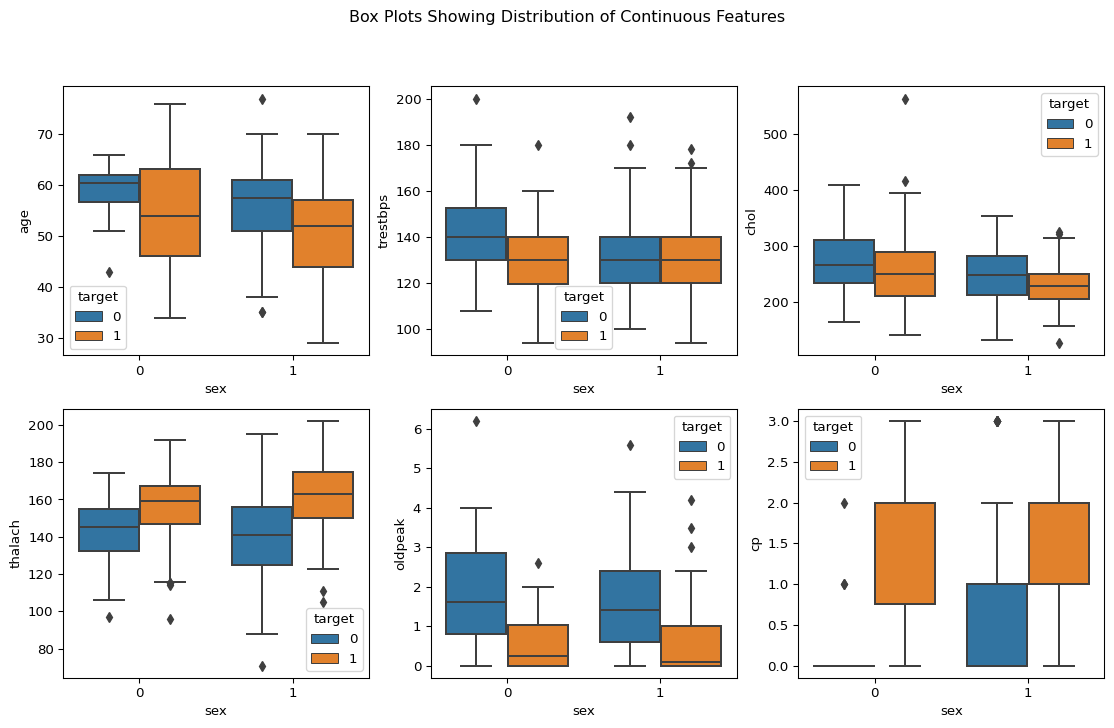

In [ ]:
# Obtain boxplot for continuous features

fig, axis = plt.subplots(nrows = 2, ncols = 3, figsize = (14, 8), dpi = 96, sharey = False)
sns.boxplot(y = 'age', x = 'sex', hue = 'target', data = df, ax = axis[0, 0])
sns.boxplot(y = 'trestbps', x = 'sex', hue = 'target', data = df, ax = axis[0, 1])
sns.boxplot(y = 'chol', x = 'sex', hue = 'target', data = df, ax = axis[0, 2])
sns.boxplot(y = 'thalach', x = 'sex', hue = 'target', data = df, ax = axis[1, 0])
sns.boxplot(y = 'oldpeak', x = 'sex', hue = 'target', data = df, ax = axis[1, 1])
sns.boxplot(y = 'cp', x = 'sex', hue = 'target', data = df, ax = axis[1, 2])
fig.suptitle('Box Plots Showing Distribution of Continuous Features')
plt.show()

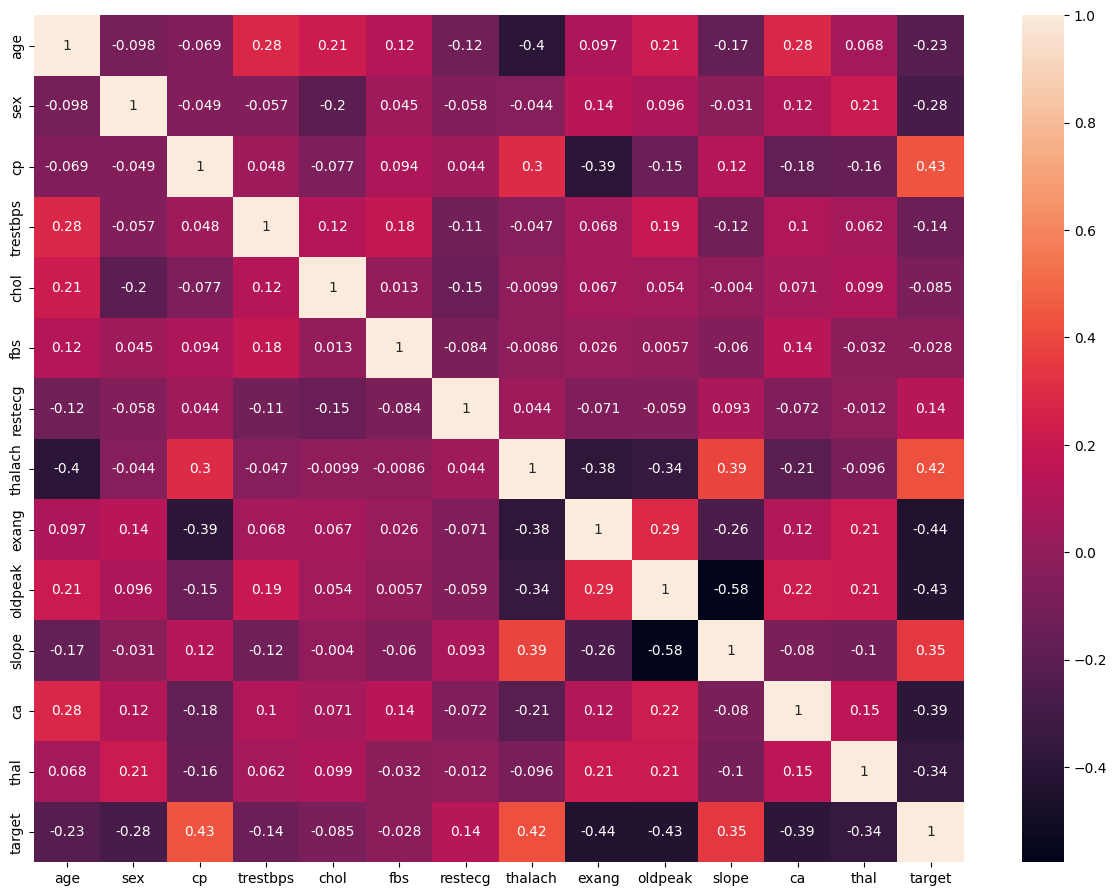

In [ ]:
# Obtain the correlation heatmap

corr_df = df.corr()
plt.figure(figsize = (15, 11))
sns.heatmap(corr_df, annot = True)
plt.show()

In [ ]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(features_df, target_df, test_size = 0.3, random_state = 42, stratify = target_df)

# Print the shape of train and test sets.
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (212, 13)
Shape of X_test: (91, 13)
Shape of y_train: (212,)
Shape of y_test: (91,)


---

#### Naive Bayes Classifier

To construct a Classifier using Naive Bayes:

1. Import the required library which contains methods and attributed to design a Naive Bayes Classifier.

  ```python
  from sklearn.naive_bayes import GuassianNB
  ```
2. Create an object (say `nb_clf`) of the `GaussianNB()` constructor.

4. Call the `fit()` function on the above constructor with train features and target variables as inputs.

5. Get the predicted target values for both train and test sets by calling the `predict()` function on `nb_clf`.

6. Get the accuracy score on both train and test sets by calling the `accuracy_score()` function on the `metrics` object.




In [ ]:
# Naive Bayes Classifier

# Import the required library
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
# Modeling the NB Classifier
nb_clf = GaussianNB()
nb_clf.fit(X_train, y_train)

# Predicting the train and test sets
y_train_predict_nb = nb_clf.predict(X_train)
y_test_predict_nb = nb_clf.predict(X_test)

# Evaluating accuracy scores
print('Accuracy on the training set: {:.2f}'.format(nb_clf.score(X_train, y_train)))
print('Accuracy on the test set: {:.2f}'.format(nb_clf.score(X_test, y_test)))

# Obtain the Confusion Matrix for the Classifier

#from sklearn.metrics import plot_confusion_matrix, classification_report

#plot_confusion_matrix(nb_clf, X_test, y_test, values_format = 'd')
print(classification_report(y_test, y_test_predict_nb))

Accuracy on the training set: 0.86
Accuracy on the test set: 0.79
              precision    recall  f1-score   support

           0       0.81      0.71      0.75        41
           1       0.78      0.86      0.82        50

    accuracy                           0.79        91
   macro avg       0.79      0.78      0.79        91
weighted avg       0.79      0.79      0.79        91



---

#### Model Evaluation: ROC Curve


AUC Score for Naive Bayes Classifier: 0.78 %


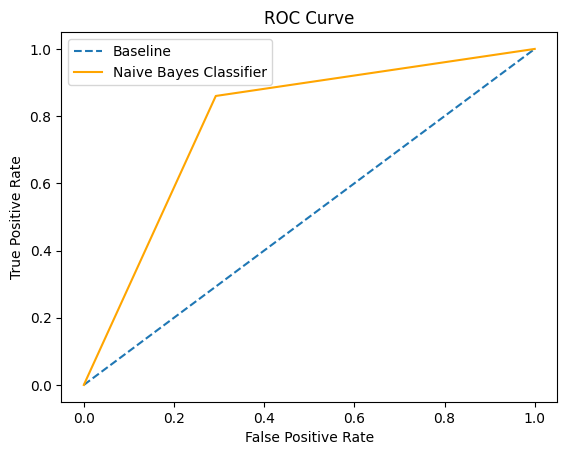

In [ ]:
# Obtain the AUC Scores

from sklearn.metrics import roc_auc_score

roc_nb = roc_auc_score(y_test,y_test_predict_nb)
print('AUC Score for Naive Bayes Classifier: {:.2f} %'.format(roc_nb))

# Plot the ROC curve

from sklearn.metrics import roc_curve
# Obtain 'fpr', 'tpr' and threshold values
fpr_nb, tpr_nb, threshold_nb = roc_curve(y_test, y_test_predict_nb)


# Plot roc curves
plt.plot([0, 1], [0, 1], linestyle = '--', label = 'Baseline')
plt.plot(fpr_nb, tpr_nb, color = 'orange', label = 'Naive Bayes Classifier')


plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()

plt.show()

---

#### Activity 1: Understanding Joint and Conditional Probability

Let us first recall the important concepts of Probability.

**Probability**: Probability of an outcome or an event is defined as the ratio of the number of favourable outcomes to the total number of possible outcomes.

**Event**: In probability, event is an outcome of a random experiment.

Mathematically, the probability of an outcome or an event $E$ is given by:

$$P(E) = \frac{\text{Number of favourable outcomes}}{\text{Total number of outcomes}}$$

or

$$P(E) = \frac{n(E)}{n(S)}$$

Where,

- $E$ is a set containing favourable outcomes.

- $n(E)$ is the number of items contained in the set $E$.

- $S$ is a set of all possible outcomes which is also known as **sample space**.

- $n(S)$ the number of items contained in the set $S$.

**Question**: What is the probability of drawing an Ace from a pack of 52 cards?

**Answer**: As we know a pack of cards has four Aces, the probability of drawing an Ace from 52 cards will be:

\begin{align}
P(\text {Ace}) = \frac {4}{52} = \frac{1}{13}
\end{align}

<center><img src=https://s3-whjr-v2-prod-bucket.whjr.online/whjr-v2-prod-bucket/d7d5a902-ec60-4296-950b-2be1ca073b7b.png width=300>

`Image by` <a href="https://pixabay.com/images/id-161404/">`OpenClipart-Vectors`</a> `from` <a href="https://pixabay.com">`Pixabay`</a></center>

<br>

Now let's have a look at the types of Probability:

1. Joint Probability

2. Conditional Probability

#### **Joint Probability**:

A **joint probability** is the probability of two events occurring simultaneously. Let's say probability of event A is $P(A)$ and that of event B is $P(B)$, then the joint probability of event A and B can be expressed as:

\begin{align}
P(A,B) = P(A \cap B) = P(A) \times P(B)
\tag{1.1}
\end{align}

**Joint Probability and Independent Events**

For joint probability calculations to work, the events must be **independent**. In other words, the outcome of one event must not impact the outcome of the other event.

$\Rightarrow$ For example, two coin tosses are **independent events** as first coin toss does not impact second coin toss.

$\Rightarrow$ On the other hand,  removing coloured balls from a bag are **dependent events**. Each time you remove a coloured ball,  the probability of drawing out a certain coloured ball will change.


**Question**: What is the probability of drawing an Ace of black colour from a pack of 52 cards?

**Solution:** Let us use the concept of joint probability here.

Suppose:   

1. Event A: Drawing an Ace from the pack of cards.

2. Event B: Drawing a black coloured card.

Probability of event A: $P(A) = \frac {4}{52}$
as a pack of 52 cards has 4 Aces in total.

Probability of event B: $P(B) = \frac {26}{52}$ as a pack of 52 cards has 26 black coloured cards in total.

Hence using equation $1.1$, we have:

\begin{align}
\boxed {P(A,B) = P(A \cap B) = \frac {4}{52} \times \frac {26}{52} = \frac{1}{26}}
\end{align}

**Alternate Solution**: As we know a pack of cards has two Aces of black colour the probability of drawing an Ace of black colour would be:

\begin{align}
P(\text {Ace}) = \frac {2}{52} = \frac{1}{26}
\end{align}

which is the same as inferred from the joint probability.

<center><img src=https://s3-whjr-v2-prod-bucket.whjr.online/whjr-v2-prod-bucket/b7d269b1-fb02-48ab-8c3a-59da94b64ce7.png width=200>

`Image by` <a href="https://pixabay.com/images/id-785262/">`Laci Molnár`</a> `from` <a href="https://pixabay.com">`Pixabay`</a></center>



<br/>

#### **Conditional Probability**:

A conditional probability is the probability of event A, given that event B is *true*. Mathematically expressed as:

\begin{align}
P(A|B) = \frac{P(A \cap B)}{P(B)}
\tag{1.2}
\end{align}

Let us understand this with the help of a simple example:

**Question**: What is the probability of drawing an Ace, given it is a black card.

**Solution**:

1. Event A: Drawing an Ace from the pack of cards.

2. Event B: Drawing a black coloured card.

To find conditional probability $P(A|B)$, we first obtain the value of joint probability $P(A \cap B)$. Hence from equation $1.1$,  we have:

\begin{align}
P(A \cap B) = P(A) \times P(B) = \frac {4}{52} \times \frac {26}{52} = \frac{1}{26}
\end{align}

Also, $P(B)$ can be calculated as:

\begin{align}
P(B) = \frac{26}{52} = \frac{1}{2}
\end{align}

Since, there are a total of 26 black coloured cards in a deck of 52 cards.

Hence, using above two probabilities and substituting the values in equation $1.2$ we have:

\begin{align}
P(A|B) = \frac{P(A \cap B)}{P(B)} = \frac{1/26}{1/2} = \frac{2}{26} = \frac{1}{13}
\end{align}

**Alternate Solution:** As we know that there are 26 black cards in a deck out of which we have 2 Aces. Hence:

\begin{align}
P(\text {Ace}) = \frac{2}{26} = \frac{1}{13}
\end{align}


which is the same as inferred from our common knowledge of a deck of cards of drawing an Ace given the card is of black colour.

<center><img src=https://s3-whjr-v2-prod-bucket.whjr.online/whjr-v2-prod-bucket/ba177a37-d399-44d0-99e2-603dfe5adaf6.png width=700>

`Image by` <a href="https://pixabay.com/images/id-37194/">`Clker-Free-Vector-Images`</a> `from` <a href="https://pixabay.com">`Pixabay`</a></center>

---

#### Activity 2: Bayes' Theorem

To recall Naive Bayes is a simple algorithm which falls under Supervised Learning technique. Why is it called Naive Bayes?

- **Naive:** It is called **naive** as it is based on a simple assumption that all the features of a dataset are mutually independent of each other.

- **Bayes:** It is based on **Bayes' Theorem**.

<br>

**Bayes' Theorem**:

Named after Thomas Bayes an English statistician and a philosopher, Bayes' theorem is a way of finding a probability when we know certain other probabilities.

Bayes' theorem is based on **Conditional probability** which states that something will happen, given that something else has already occurred.  

Mathematically Bayes' theorem can be expressed as:

\begin{align}
P(A|B) = \frac{P(B|A) \times P(A)}{P(B)}
\end{align}

Where,

- $P(A)$ is the probability of event A. It is also called as **Prior probability** of A. Prior probability is  nothing but the probability of an event before any new data is collected.

- $P(B)$ is the prior probability of event B. It is also called as **Marginal probability** or **Evidence** of B . Marginal probability or evidence is the probability of a single event occurring, independent of other events.

- $P(A|B)$ is the probability of event A given value of event B. Hence, it is a conditional probability and not marginal probability as occurring of event A depends on event B. It is also called as **Posterior  probability** or revised probability, as prior probability $P(A)$ is now revised to $P(A|B)$.

- $P(B|A)$ is the probability of event B given value of event A. Hence, it is also a conditional probability as occurring of event B depends on event A. It is also called as **Likelihood** of event B given event A is true.

Hence, the Bayes' theorem can also be restated as:
\begin{align}
\text{Posterior} = \frac{\text{Likelihood} \times \text{Prior}}{\text {Evidence}}
\end{align}

You may notice that the Bayes' Theorem includes two conditional probabilities for the events A and B.

Let us understand this theorem using a simple example:

**Problem:** The probability of raining is 20% and probability that the weather will be cloudy is 30%. The probability of cloudy weather given that rain happens is 60%. What is the chance of raining given that the weather is cloudy?

**Solution:**

- $P(\text{Rain}) = 20\%$
- $P(\text{Cloud}) = 30\%$
- $P(\text{Cloud|Rain}) = 60\%$
- $P(\text{Rain|Cloud}) = ? $

Using Bayes' Theorem,

\begin{align}
P(\text{Rain|Cloud}) &= \frac{P(\text{Cloud|Rain}) \times P(\text{Rain})}{P(\text{Cloud})} \\ &= \frac{0.6 \times 0.2}{0.3} = 0.4
\end{align}

Hence, there is $40\%$ chance of raining given that the weather is cloudy.

The Bayes' theorem is also a primary way of calculating conditional probability without calculating joint probability as seen in equation 1.2

**Deriving Bayes' theorem using conditional probability:**

Let's derive the Bayes' theorem with the help of conditional probability. From equation 1.2,  we have:

\begin{align}
P(A|B) &= \frac{P(A \cap B)}{P(B)}\\
\Rightarrow P(A \cap B) &= P(A|B) \times P(B)
\tag{2.1}
\end{align}

Similarly,

\begin{align}
P(B|A) &= \frac{P(B \cap A)}{P(A)}\\
\Rightarrow P(B \cap A) &= P(B|A) \times P(A)
\tag{2.2}
\end{align}

The intersection of two probabilities is **associative** which means:

\begin{align}
P(A \cap B) = P(B \cap A)
\end{align}

Therefore, from equations 2.1 and 2.2, we can write:

\begin{align}
P(A|B) \times P(B) &= P(B|A) \times P(A) \\
\Rightarrow P(A|B) &= \frac{P(B|A) \times P(A)}{P(B)}
\tag{2.3}
\end{align}

which is nothing but the Bayes' theorem.



Let's rewrite the Bayes' theorem keeping a supervised Machine Learning problem statement as objective. Say we have a dataset having $n$ features  $x_1, x_2, \dots, x_n$ and a target label denoted as $y$. For this,  the Bayes' theorem can be expressed as:


\begin{align}
P(y|x_1, x_2, \dots , x_n) = \frac{P(x_1, x_2, \dots, x_n|y) }{P(x_1, x_2, \dots, x_n)} \times P(y)
\tag{2.4}
\end{align}


Now that we have understood Bayes' theorem, let us use this theorem in performing classification with Naive Bayes Classifier.



---

#### Activity 3: Understanding Naive Bayes Classifier

The Naive Bayes Classifier or simple Bayesian Classifier works as follows:

1. Suppose that $X = (x_1, x_2, \dots , x_n)$ is a tuple or instance whose target class is to be predicted. Here,  $x_1, x_2, \dots , x_n$ are the features of that instance.


2. Let's say that the target variable has $m$ unique classes and $c_i$ denotes one of $m$ classes.


3. Using Bayes’ theorem we can calculate the
posterior probability, $P(c_i|X)$, from $P(c_i)$, $P(X)$, and $P(X|c_i)$ as follows:

\begin{align}
P(c_i|X) = \frac{P(X|c_i) \times P(c_i)}{P(X)}
\end{align}

4. The Classifier will predict that $X$ belongs to class **having highest posterior probability** condition on $X$.

  In simple words, a tuple $X$ belongs to class $c_i$ if:

\begin{align}
P(c_i | X) > P(c_j | X) \qquad \text{for} \space 1 \leq j \leq m \space \text{and} \space j \ne i
\end{align}


💡 **Note:**
- It would be difficult to compute $P(X|c_i)$ if the features of $X$ are dependent on each other. Hence, the Naive Bayes Classifier makes a simplistic (Naive) assumption called **class conditional independence**. According to this, the Classifier assumes that the feature values are independent of each other.

- Thus, the conditional probability calculation of $P(X|c_i)$ is reduced to multiplication of the independent event probabilities as follows:

\begin{align}
P(X|c_i) = P(x_1 | c_i) \times P(x_2 |c_i) \times \dots \times P(x_n | c_i)
\end{align}


Let us understand these steps using a simple problem statement.


**Problem Statement:** Let's say you have to schedule a football/soccer game based on the weather conditions. You are provided with a dataset of game played/not played based on weather conditions for previous 14 days.


| Day | Outlook | Temperature | Humidity | Wind | Play |
| -- | -- | -- | -- | -- | --|
| 1 | Sunny | Hot | High | Weak | No |
| 2 | Sunny | Hot | High | Strong | No |
| 3 | Overcast | Hot | High | Weak | Yes |
| 4 | Rain | Mild | High | Weak | Yes |
| 5 | Rain | Cool | Normal | Weak | Yes |
| 6 | Rain | Cool | Normal | Strong | No |
| 7 | Overcast | Cool | Normal | Strong | Yes |
| 8 | Sunny | Mild | High | Weak | No |
| 9 | Sunny | Cool | Normal | Weak | Yes |
| 10 | Rain | Mild | Normal | Weak | Yes |
| 11 | Sunny | Mild | Normal | Strong | Yes |
| 12 | Overcast | Mild | High | Strong | Yes |
| 13 | Overcast | Hot | Normal | Weak | Yes |
| 14 | Rain | Mild | High | Strong | No |

<br>
<center><code>Table 1: Game Play Record for Previous 14 Days</code></center>


Based on the dataset above, you need to decide whether to play football on day 15 with following weather conditions:

| Day | Outlook | Temperature | Humidity | Wind | Play |
| -- | -- | -- | -- | -- | --|
| 15 | Sunny | Cool | High | Strong | ❓ |

<br>

<center>

*Will there be a game on day 15*?⛹

<img src=https://s3-whjr-v2-prod-bucket.whjr.online/whjr-v2-prod-bucket/078b4b8c-aefa-4379-afed-c32203ac548f.jpg width=300>

`Image by` <a href="https://pixabay.com/images/id-390945/">`PDPics`</a> `from` <a href="https://pixabay.com">`Pixabay`</a></center>

**Solution:**

Let's create a DataFrame for the above dataset using the following link:

https://s3-whjr-curriculum-uploads.whjr.online/31ab35aa-0632-4c14-8ee5-66bb72344576.csv

In [ ]:
# S3.1: Import the required modules and load the game play dataset. Also, display the first five rows.
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

# Read the csv file and create the DataFrame
df_play = pd.read_csv('https://s3-whjr-curriculum-uploads.whjr.online/31ab35aa-0632-4c14-8ee5-66bb72344576.csv')
df_play.head()

,Outlook,Temperature,Humidity,Wind,Play
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes


For the above dataset, the `Play` column is the target variable and the other 4 columns except `Play` are feature variables.

The target variable `Play` takes two possible values: `Yes` and `No`. Hence, we have two classes,
 - $c_1 \rightarrow Yes$
 - $c_2 \rightarrow No$

Let $X$ be the instance whose class label is to be predicted (day 15):

| Day | Outlook | Temperature | Humidity | Wind | Play |
| -- | -- | -- | -- | -- | --|
| 15 | Sunny | Cool | High | Strong | ❓ |

Thus,

$X = (\text{Outlook = Sunny, Temperature = Cool,
Humidity = High, Wind = Strong})$

Recall the Bayes' theorem:

\begin{align}
 P(c_i|X) = \frac{P(X|c_i) \times P(c_i)}{P(X)} && \text{i.e.} &&
\text{Posterior} = \space \frac{\text{Likelihood} \times \text{Prior}}{\text {Evidence}}
\end{align}



Let us first calculate prior probability  $P(c_i)$

**Step 1: Calculate Prior Probabilities:**


As there are two class labels (Yes/No), $P(\text {Yes})$ and $P(\text {No})$ are the prior probabilities. From the game play dataset we have:

<center>
<img src=https://s3-whjr-v2-prod-bucket.whjr.online/whjr-v2-prod-bucket/9e1b4eec-7d6d-43f8-9228-072085796da8.png width=350></center>

As the record is for 14 days, **Prior Probabilities** can be calculated as:

\begin{align}
P(c_1) = P(\text {Yes}) = \frac{\text {no. of days on which game was played}}{\text{total no. of days}} = \frac{9}{14} = 0.6428\\
P(c_2) = P(\text {No}) = \frac{\text {no. of days on which game was not played}}{\text{total no. of days}} = \frac{5}{14} = 0.3571
\end{align}

Let us also perform this computation using Python.

In [ ]:
# S3.2: Calculate Prior Probabilities

# Obtain total 'Yes' and 'No' values for 'Play'
num_yes=(df_play['Play'] == "Yes").sum()
num_no=(df_play['Play'] == "No").sum()

# Calculate prior probabilities from Yes and No occurrences in the 'Play' Column
P_Yes = num_yes / df_play.shape[0]
P_No = num_no / df_play.shape[0]
# Print the probability
print('Yes:',P_Yes)
print('No:',P_No)

Yes: 0.6428571428571429
No: 0.35714285714285715


**Step 2: Calculate Likelihood $P(X|c_i)$:**

Now, we need to calculate likelihood of all the 4  features for both target labels. Let us compute it one by one for each feature.

- **For feature `Outlook`:**

The possible values of `Outlook` feature for both target labels are summarised in the image given below:

<center><img src="https://s3-whjr-v2-prod-bucket.whjr.online/whjr-v2-prod-bucket/24c134f9-bdc3-4fed-a667-1be7f52c6986.png"/></center>

From the dataset and the above image, we can see that the `Outlook` feature has three values: `Sunny`, `Overcast` and `Rain`. However, we are  interested in calculating probability for `Sunny` only, as the unknown instance $X$ has `Outlook = Sunny`.

Thus, $P(X|c_i)$ for feature `Outlook = Sunny` is calculated as:
- $P(x_1|c_1) = P(Sunny|Yes) = \frac{2}{9}$ . This is because, out of 9 `Play = Yes` tuples, 2 tuples has `Outlook = Sunny`.
- $P(x_1|c_2) = P(Sunny|No) = \frac{3}{5}$ . This is because, out of 5 `Play = No` tuples, 3 tuples has `Outlook = Sunny`.

**Note:** Similarly, if you want to calculate probability for `Outlook = Overcast`, then the respective probabilities would be:               
- $P(Overcast|Yes) = \frac{4}{9}$ . This is because, out of 9 `Play = Yes` tuples, 4 tuples has `Outlook = Overcast`.
- $P(Overcast|No) = \frac{0}{5}$ . This is because, out of 5 `Play = No` tuples, 0 tuples has `Outlook = Overcast`.

In [ ]:
# S3.3: Calculate Conditional Probability or Likelihood for 'Outlook'
P_Sunny_Yes = len(df_play[(df_play['Outlook'] == "Sunny") & (df_play['Play'] == "Yes")]) / num_yes
P_Sunny_No = len(df_play[(df_play['Outlook'] == "Sunny") & (df_play['Play'] == "No")]) / num_no
print("P(Sunny|Yes):", P_Sunny_Yes)
print("P(Sunny|No):", P_Sunny_No)

P(Sunny|Yes): 0.2222222222222222
P(Sunny|No): 0.6


Similalrly, let us calculate the likelihood for remaining 3 features.

- **For feature `Temperature`:**

The possible values of `Temperature` feature for both target labels are summarised in the image given below:

<center><img src="https://s3-whjr-v2-prod-bucket.whjr.online/whjr-v2-prod-bucket/c1013fb7-d0d5-4d3b-a1ae-cfd330381bdf.png"/></center>

From the dataset and the above image, we can see that the `Temperature` feature has three values: `Hot`, `Mild` and `Cool`. However, we are  interested in calculating probability for `Cool` only, as the unknown instance $X$ has `Temperature = Cool`.

Thus, $P(X|c_i)$ for feature `Temperature = Cool` is calculated as:
- $P(x_2|c_1) = P(Cool|Yes) = \frac{3}{9}$ . This is because, out of 9 `Play = Yes` tuples, 3 tuples has `Temperature = Cool`.
- $P(x_2|c_2) = P(Cool|No) = \frac{1}{5}$ . This is because, out of 5 `Play = No` tuples, 1 tuple has `Temperature = Cool`.



In [ ]:
# S3.4: Calculate Conditional Probability or Likelihood for 'Temperature'
P_Cool_Yes = len(df_play[(df_play['Temperature'] == "Cool") & (df_play['Play'] == "Yes")]) / num_yes
P_Cool_No = len(df_play[(df_play['Temperature'] == "Cool") & (df_play['Play'] == "No")]) / num_no
print("P(Cool|Yes):", P_Cool_Yes)
print("P(Cool|No):", P_Cool_No)

P(Cool|Yes): 0.3333333333333333
P(Cool|No): 0.2


- **For feature `Humidity`:**


<center><img src="https://s3-whjr-v2-prod-bucket.whjr.online/whjr-v2-prod-bucket/b53f7437-1afa-42a8-b65f-4bd4dcf25c5e.png"/></center>


$P(X|c_i)$ for feature `Humidity = High` is calculated as:
- $P(x_3|c_1) = P(High|Yes) = \frac{3}{9}$ . This is because, out of 9 `Play = Yes` tuples, 3 tuples has `Humidity = High`.
- $P(x_3|c_2) = P(High|No) = \frac{4}{5}$ . This is because, out of 5 `Play = No` tuples, 4 tuples has `Humidity = High`.



In [ ]:
# S3.5: Calculate Conditional Probability or Likelihood for 'Humidity'
P_High_Yes = len(df_play[(df_play['Humidity'] == "High") & (df_play['Play'] == "Yes")]) / num_yes
P_High_No = len(df_play[(df_play['Humidity'] == "High") & (df_play['Play'] == "No")]) / num_no

- **For feature `Wind`:**


<center><img src="https://s3-whjr-v2-prod-bucket.whjr.online/whjr-v2-prod-bucket/9577f00d-a4f5-4b87-a808-a360ae6e77ff.PNG"/></center>


$P(X|c_i)$ for feature `Wind = Strong` is calculated as:
- $P(x_4|c_1) = P(Strong|Yes) = \frac{3}{9}$ . This is because, out of 9 `Play = Yes` tuples, 3 tuples has `Wind = Strong`.
- $P(x_4|c_2) = P(Strong|No) = \frac{3}{5}$ . This is because, out of 5 `Play = No` tuples, 3 tuples has `Wind = Strong`.




In [ ]:
# S3.6: Calculate Conditional Probability or Likelihood for 'Wind'
P_Strong_Yes = len(df_play[(df_play['Wind'] == "High") & (df_play['Play'] == "Yes")]) / num_yes
P_Strong_No = len(df_play[(df_play['Wind'] == "High") & (df_play['Play'] == "No")]) / num_no

Now that we have obtained the likelihood for each features, we need to obtain final value of $P(X|c_1)$ and $P(X|c_2)$. For this, simply multiply the likelihood values of all the features, as the Naive Bayes Classifier assumes that the feature values are independent of one another.

Thus,

\begin{align}
P(X|c_1): P(\text {Sunny, Cool, High, Strong}|\text {Yes}) &= P(Sunny|Yes) \times P(Cool|Yes) \times P(High|Yes) \times P(Strong|Yes) \\ &=\frac {2}{9} \times \frac{3}{9} \times \frac{3}{9} \times \frac{3}{9}
\end{align}

\begin{align}
P(X|c_2): P(\text {Sunny, Cool, High, Strong}|\text {No}) &= P(Sunny|No) \times P(Cool|No) \times P(High|No) \times P(Strong|No) \\ &=\frac {3}{5} \times \frac{1}{5} \times \frac{4}{5} \times \frac{3}{5}
\end{align}

Let us perform this calculation using Python.



In [ ]:
# S3.7: Calculate final likelihood or conditional probabilities for 'Yes' and 'No' values
P_X_c1 = P_Sunny_Yes * P_Cool_Yes * P_High_Yes * P_Strong_Yes
P_X_c2=P_Sunny_No * P_Cool_No * P_High_No * P_Strong_No

Now, we have calculated both prior probability and likelihood, let us look how to find Marginal Probability or Evidence.

**Calculating Marginal Probability or Evidence:**  

To calculate Evidence $P(X)$ we need to check how many times each of the weather events (or feature) occurred in previous 14 days.

Consider the feature `Outlook`:               

<center><img src ="https://s3-whjr-v2-prod-bucket.whjr.online/whjr-v2-prod-bucket/14c0c4d7-de84-49bc-9a52-3e0e5215cbe6.PNG"/></center>

As we are interested only in `Outlook = Sunny`, there are 5 tuples out of total 14 tuples where the value of `Outlook` is `Sunny`.

Thus, $P(x_1): P(Sunny) = \frac{5}{14}$

Similarly, we can calculate the values for:
- $P(x_2): P(Cool)$
- $P(x_3): P(High)$
- $P(x_4): P(Strong)$

But wait ✋, before doing further calculations, let's recall the Bayes' theorem:

\begin{align}
P(c_i|X) = \frac{P(X|c_i) \times P(c_i)}{P(X)}
\end{align}

- For class $c_1$, Bayes' theorem would be:        

$$P(c_1|X) = \frac{P(X|c_1) \times P(c_1)}{P(X)}$$

- For class $c_2$, Bayes' theorem would be:        

$$P(c_2|X) = \frac{P(X|c_2) \times P(c_2)}{P(X)}$$


 Note, that the denominator (Evidence) will be same for both $P(c_1|X)$ and $P(c_2|X)$.

 Hence, while comparing $P(c_1|X)$ with  $P(c_2|X)$ for identifying the class of unknown tuple $X$, the denominator (Evidence) is useless. Hence, there is no need to calculate Evidence while performing classification using Naive Bayes Classifier.

Now that all the probabilities are calculated, let us proceed to the final step of calculating posterior probabilities for both the class and comparing them to obtain the final result.

**Predicting the game play decision for day 15:**

Considering the numerator part from Bayes' theorem we can obtain the posterior probabilities for class `Yes` and `No` as follows:

- For class $c_1$ (`Play = Yes`)
\begin{align}
P(c_1 | \text{X}): P(\text {Yes} | \text{(Sunny, Cool, High, Strong)} &= P(\text {Sunny, Cool, High, Strong}|\text {Yes}) \times P(\text{Yes}) \\   
\end{align}

- For class $c_2$ (`Play = No`)
\begin{align}
P(c_2 | \text{X}): P(\text {No} | \text{(Sunny, Cool, High, Strong)} &= P(\text {Sunny, Cool, High, Strong}|\text {Yes}) \times P(\text{No}) \\   
\end{align}

Let us perform this calculation using Python.

In [ ]:
# S3.8: Evaluate Game Play Probabilities Using Bayes' Theorem
P_c1_X = P_X_c1 * P_Yes
print("Probability of having a game : ", P_c1_X)

# Probability for not having a game
P_c2_X = P_X_c2 * P_No
print("Probability of not having a game : ", P_c2_X)




Probability of having a game :  0.0
Probability of not having a game :  0.0


From the output, you may observe that:   
 $$P(c_1 | \text{X}) < P(c_2 | \text{X})$$ i.e.
$$P(Yes | \text{X}) < P(No | \text{X})$$

**Answer:** Since the probability for **not** having a game is higher when compared with probability for having a game, we predict that the outcome for day  15 is **No**.

| Day | Outlook | Temperature | Humidity | Wind | Play |
| -- | -- | -- | -- | -- | --|
| 15 | Sunny | Cool | High | Strong | <font color = red> **No** </font> |

**Summarising the steps of Naive Bayes Classifier:**
1. Calculate prior probability $P(c_i)$ for each class.
2. Calculate likelihood for all the feature values $P(X|c_i)$.
3. Calculate $P(X|c_i) \times P(c_i)$ for each class. The class $c_i$ for which $P(X|c_i) \times P(c_i)$ is maximum would be the predicted class label.

The detailed steps for Naive Bayes Classifier is shown in the flowchart below:

<center><img src=https://s3-whjr-v2-prod-bucket.whjr.online/whjr-v2-prod-bucket/1fd6ebcc-33c0-46e1-ba64-e79696b15353.png width=200></center>



Next let's  predict the game play on day $15^{th }$ using Naive Bayes Classifier model available in scikit-learn.



---

#### Activity 4: Naive Bayes Classifier Using `sklearn.naive_bayes`

Let us determine the target label for the above gameplay dataset using scikit-learn module of Python.

Before, let us display the total number of rows, features, data types of columns (features) and check for any missing values in the dataset.

In [ ]:
# S4.1: Apply the 'info()' function on the 'df_play' DataFrame.
df_play.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Outlook      14 non-null     object
 1   Temperature  14 non-null     object
 2   Humidity     14 non-null     object
 3   Wind         14 non-null     object
 4   Play         14 non-null     object
dtypes: object(5)
memory usage: 688.0+ bytes


All the columns of the dataset are categorical. However, to use Naive Bayes Classifier, these features must be converted to integer values.

Let us perform label encoding on the DataFrame using the steps given below:     

1. Import `LabelEncoder` class from `sklearn.preprocessing` module.

2. Create an object of `LabelEncoder` class say `label`.

3. Initiate a `for` loop to iterate through all the columns of the DataFrame. In this loop, call the `fit_transform()` function and pass column values of the DataFrame.

4. Print the DataFrame to verify label encoding.

In [ ]:
# S4.2: Encode the categorical values
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()
for column in df_play.columns:
  df_play[column] = label.fit_transform(df_play[column])

df_play

,Outlook,Temperature,Humidity,Wind,Play
0,2,1,0,1,0
1,2,1,0,0,0
2,0,1,0,1,1
3,1,2,0,1,1
4,1,0,1,1,1
5,1,0,1,0,0
6,0,0,1,0,1
7,2,2,0,1,0
8,2,0,1,1,1
9,1,2,1,1,1


When label encoding is applied to this column, the labels would be arranged in alphabetical order and a unique index is assigned to each label starting from `0`. For example, in the feature column: `Outlook`: `Overcast` label would be encoded as `0`, `Rain` would be `1`, `Sunny` would be `2` and so on.

Also, note that the target label `Yes` is replaced with `1` and `No` is replaced with `0` by the label encoder.

Before we proceed with the Classifier design,
let's create separate DataFrames for features and the target column.

1. Create a `features_df` DataFrame by dropping the `target` column from the original DataFrame.   

2. Create a `target_df` DataFrame consisting of target values from the original DataFrame.


Also, print the shape of the features and target DataFrames.

In [ ]:
# S4.3: Create separate DataFrames for feature and target


features_df = df_play.drop('Play', axis = 1)
target_df = df_play['Play']

print(features_df.shape)
print(target_df.shape)

(14, 4)
(14,)


Next, split the DataFrames into train/test sets and display the shape of each set.

In [ ]:
# S4.4: Import train_test_split function
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(features_df, target_df, test_size = 0.3,
                                                    random_state = 2)

# Print the shape of train and test sets.
print('shape of X_train',X_train.shape)
print('shape of X_test',X_test.shape)
print('shape of y_train',y_train.shape)
print('shape of y_test',X_test.shape)
# Print the shape of train and test sets.


shape of X_train (9, 4)
shape of X_test (5, 4)
shape of y_train (9,)
shape of y_test (5, 4)


Next, let's create a Naive Bayes Classifier model. In the previous class, we used `GaussianNB` Classifier which is suitable specifically for continuous features. However, the features of our dataset contains discrete values.

Thus, we will use `CategoricalNB` Classifier which is another variant of Naive Bayes Classifier suitable for classification problems having discrete features.

To construct a Classifier using `CategoricalNB` Classifier, follow the steps given below:

1. Import the required library which contains methods and attributes to design a Naive Bayes Classifier.

  ```python
  from sklearn.naive_bayes import CategoricalNB
  ```
2. Create an object (say `nb_clf`) of the `CategoricalNB()` constructor.

4. Call the `fit()` function on the above constructor with train features and target variables as inputs.

In [ ]:
# S4.5: Implement Naive Bayes Classifier

# Import the required library
from sklearn.naive_bayes import CategoricalNB

# Model the NB Classifier
nb_clf = CategoricalNB()
nb_clf.fit(X_train, y_train)

# Predict the train and test sets
y_train_predict_nb = nb_clf.predict(X_train)
y_test_predict_nb = nb_clf.predict(X_test)

# Evaluate the accuracy scores
print('Accuracy on the training set: {:.2f}'.format(nb_clf.score(X_train, y_train)))
print('Accuracy on the test set: {:.2f}'.format(nb_clf.score(X_test, y_test)))

Accuracy on the training set: 0.89
Accuracy on the test set: 0.80


Now the Classifier model has been trained. Even from a small dataset of merely 14 data points and after splitting them into train/test with 9 and 5 datapoints, we observe that  the Naive Bayes Classifier returns an exceptional accuracy of 0.89 and 0.80 for the train and test sets. Hence, Naive Bayes Classifier performs well even for small datasets.


Let us use the Classifier to predict the game play for the $15^{th}$ day. To recall weather conditions for day 15 are given as:

| Day | Outlook | Temperature | Humidity | Wind | Play |
| -- | -- | -- | -- | -- | --|
| 15 | Sunny | Cool | High | Strong | ❓ |

Since we have encoded the features using label encoder, let pass the encoded values for features while performing prediction.

Hence, the feature set will become:

| Day | Outlook | Temperature | Humidity | Wind | Play |
| -- | -- | -- | -- | -- | --|
| 15 | 1| 0 | 0 | 0 | ❓ |

<br>

To predict the outcome of the game based on the features, call the `predict()` function using Classifier object and pass the two-dimensional array `[1, 0, 0, 0]`  as input to the predict the outcome for day 15.

In [ ]:
# S4.6: Predict the outcome for Day 15
nb_clf.predict([[1,0,0,0]])

array([0])

The outcome has been predicted as `array([0])` which means the predicted value for target is `No`, which matches with  prediction performed without using scikit-learn library in the previous activity.


**Takeaway points:** Naive Bayes Classifier can give fast results with very high accuracy when:

1. When the features as independent i.e. Naive assumptions are true (although this happens rarely with real-world data.)

2. When we have well-separated categories, especially when model is not very complex.

3. For very high-dimensional data, which can be well reduced by some feature engineering method and the model is not very complex.

4. For categorical features,  `CategoricalNB`  Naive Bayes Classifier model is advised and for continuous features `GaussianNB` Naive Bayes Classifier model is advised.

**Advantages:** Naive Bayes Classifier has several advantages:

1. They are extremely fast for both training and making predictions.

2. They provide easy to understand probability based predictions.

3. They have very few (if any) tunable parameters.

We will stop here. In the next class, we will start working on a new category of machine learning models and address a different problem statement.

---

### **Project**

You can now attempt the **Applied Tech Project 126 - Naive Bayes** on your own.

**Applied Tech Project 126 - Naive Bayes** : https://colab.research.google.com/drive/1dHufspxoaAXcvlaUF3OR0LLVrswcgtA0



---

